In [1]:
from femdvr import FEMDVR
from lobatto import GaussLegendreLobatto
import numpy as np 
import matplotlib.pyplot as plt
from scipy.sparse import kron, csr_matrix, diags
from scipy.sparse.linalg import eigsh
%matplotlib widget


In [2]:
R_max = 320
n_points = 11
n_elem = 80
elem_nodes = np.linspace(0, R_max, n_elem + 1)
femdvr0 = FEMDVR(elem_nodes, np.array([n_points] * n_elem), GaussLegendreLobatto)
r = femdvr0.x
ng = len(r)
print(r[:10], r[-10:])
r_inner = r[1:-1]


[0.         0.13199714 0.43103305 0.86952935 1.40848373 2.
 2.59151627 3.13047065 3.56896695 3.86800286] [316.13199714 316.43103305 316.86952935 317.40848373 318.
 318.59151627 319.13047065 319.56896695 319.86800286 320.        ]


In [3]:
T = -0.5 * csr_matrix(femdvr0.D2[1:-1,1:-1])

#V = diags([0.5 * (xxx**2 + yyy**2 + zzz**2)], [0], shape=T.shape)

V = diags([-1.0/r_inner], [0], shape=(ng-2,ng-2))

H = T + V

delta = H.toarray() - H.toarray().T
print("H shape:", H.shape)
print("H - H^T norm:", np.linalg.norm(delta))
print("Fraction of nonzeroes in H:", H.nnz / (H.shape[0]**2))

H shape: (799, 799)
H - H^T norm: 855.0615097559843
Fraction of nonzeroes in H: 0.01497334747282664


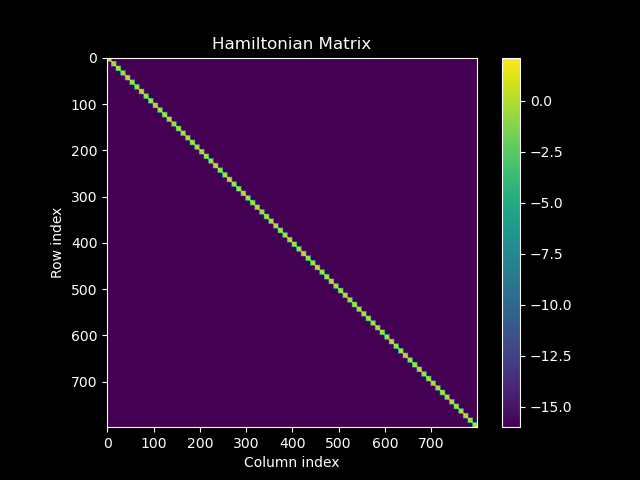

In [4]:
plt.figure()
# vmin = np.min(H.toarray())
# vmax = np.max(H.toarray())
# print("H min:", vmin, "H max:", vmax)
# vminmax = max(abs(vmin), abs(vmax))
plt.imshow(np.log10(np.abs(H.toarray()) + 1e-16), cmap='viridis', aspect='equal')
#plt.spy(H, markersize=1)
plt.colorbar()
plt.title('Hamiltonian Matrix')
plt.xlabel('Column index')
plt.ylabel('Row index')
plt.show()


In [5]:
print("Diagonalizing H...")
E, Psi = np.linalg.eig(H.toarray())
idx = E.argsort()
E = E[idx]
E_exact = -0.5 / np.array([n**2 for n in range(1, len(E)+1)])
Psi = Psi[:,idx]
n_show = min(20, len(E))
print(f"Lowest {n_show} energy levels (a.u.):")
for i in range(n_show):
    print(f"Level {i+1}: {E[i]:.6f}, exact: {E_exact[i]:.6f}, error: {np.abs(E[i] - E_exact[i]):.6e}")


Diagonalizing H...
Lowest 20 energy levels (a.u.):
Level 1: -0.500000, exact: -0.500000, error: 3.142375e-12
Level 2: -0.125000, exact: -0.125000, error: 1.998401e-15
Level 3: -0.055556, exact: -0.055556, error: 1.734723e-14
Level 4: -0.031250, exact: -0.031250, error: 2.088607e-15
Level 5: -0.020000, exact: -0.020000, error: 5.457440e-15
Level 6: -0.013889, exact: -0.013889, error: 6.441028e-15
Level 7: -0.010204, exact: -0.010204, error: 3.762615e-15
Level 8: -0.007812, exact: -0.007812, error: 9.055257e-16
Level 9: -0.006173, exact: -0.006173, error: 1.855774e-12
Level 10: -0.005000, exact: -0.005000, error: 3.515636e-09
Level 11: -0.004131, exact: -0.004132, error: 8.154116e-07
Level 12: -0.003445, exact: -0.003472, error: 2.758752e-05
Level 13: -0.002757, exact: -0.002959, error: 2.019838e-04
Level 14: -0.001929, exact: -0.002551, error: 6.219755e-04
Level 15: -0.000950, exact: -0.002222, error: 1.272100e-03
Level 16: 0.000167, exact: -0.001953, error: 2.120117e-03
Level 17: 0.001

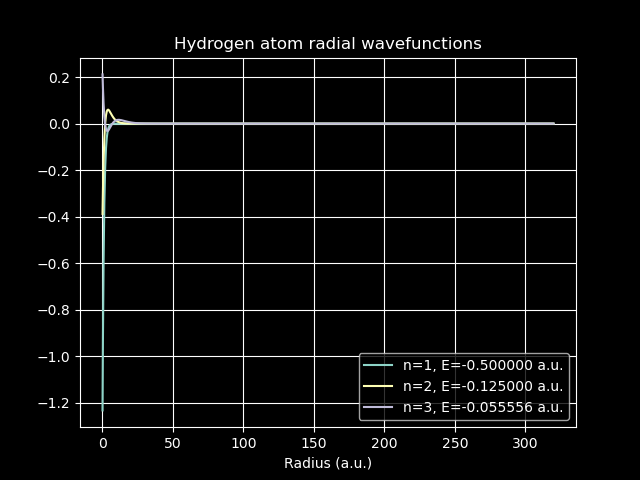

In [9]:
plt.figure()
show = [0, 1, 2]
for j in show:
    plt.plot(r[1:-1], Psi[:,j]/r_inner, label=f'n={j+1}, E={E[j]:.6f} a.u.')
plt.title('Hydrogen atom radial wavefunctions')
plt.xlabel('Radius (a.u.)')
plt.legend()
plt.grid()
plt.show()